# Introduction to Python and Statsmodels

Welcome and thank you for your interest in Clear Future and Haver analystics offerings in Applied Time Series with Python. This Jupyter notebook is a short example that hopefully will fuel your curiosity. We encourage you to work through the notebook. As a quick start to execute any line of code you can use Shift-Enter. We look forward to seeing you at the Haver office. Good luck and have fun! Daniel and Abdel

Statsmodels is the library we will use for most of our time series work. It has a very general set of models we can estimate including OLS linear models, ARMA models, and VAR/VECM models. I would consider this a workhouse library in Python. It also has some very convenient example datasets we can work with directly from the library.

Lets suppose we are tasked with performing a business-cycle analysis of U.S. Real GDP. We can use some pretty cool startistical tools to help us better understand the long-term behavior of the U.S. economy in both cyclical and trend terms.

Let's start by importing the needed libraries. It is convention to assign a shorter name to many commonly used libraries. For example numpy as np

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

Let's take a look at some example data that comes with the pandas library.

In [2]:
df = sm.datasets.macrodata.load_pandas().data

The print command will give you a look into the macrodata data set.

In [3]:
print(sm.datasets.macrodata.NOTE)

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

The head and tail commands will give you a quick look at the first 5 observations of a dataframe. Try running the tail command om your own.

In [4]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


We need to index the dataframe with time rather than an ordinal ranking. Look again at the prior line of code. The "year" is currently a series in the dataframe, but the DF is not time indexed. The next few lines will reassign the year as the index.

In [5]:
index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))

In [6]:
df.index = index

In [7]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


Lets plot U.S. real GDP and add a label. Any observations by looking at the level series of U.S. real GDP? 

Text(0,0.5,'REAL GDP')

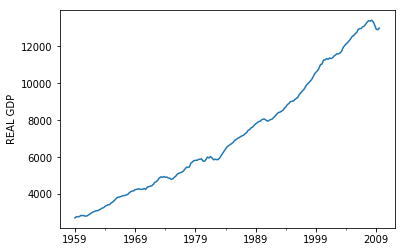

In [8]:
df['realgdp'].plot()
plt.ylabel("REAL GDP")

## Using Statsmodels to get the trend

The Hodrick-Prescott filter separates a time-series  y_t  into a trend  τ_t and a cyclical component  ζt

We will use a routine in the statsmodels library to perform a Hodrick Prescott filtering on the data.

We will create both a cyclical series (gdp_cycle) and a trend series (gdp_trend)

In [9]:
gdp_cycle, gdp_trend = sm.tsa.filters.hpfilter(df.realgdp)

In [10]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


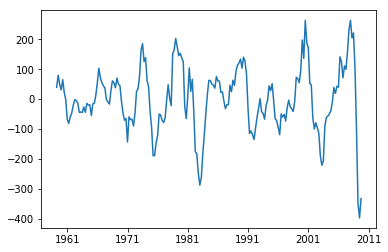

In [11]:
plt.plot(gdp_cycle)

If you ever need to check what the data type is....use the type() command

In [12]:
type(gdp_cycle)

pandas.core.series.Series

In [13]:
df["trend"] = gdp_trend

Lets plot the HP-filtered long-run trend with the actual data series. Sometimes the trend-series is thought of as potential GDP.

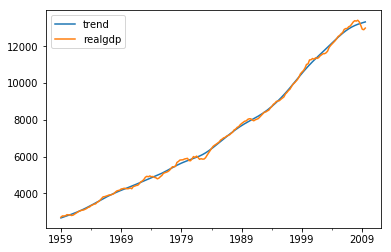

In [14]:
df[['trend','realgdp']].plot()

If you wanted to subset the data using the time index you created earlier, you can easily do that.

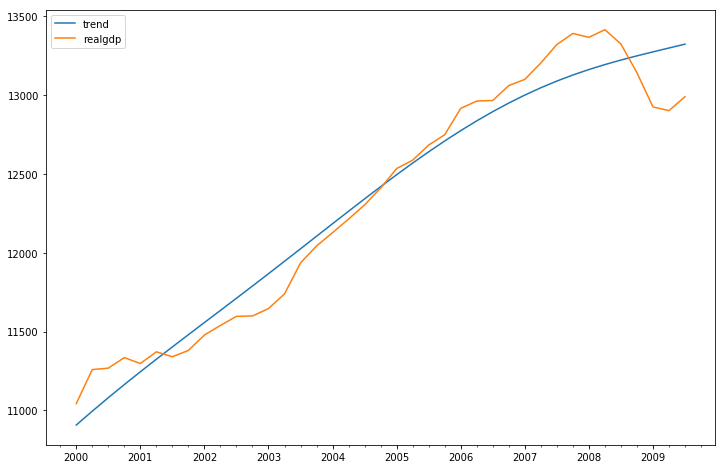

In [15]:
df[['trend','realgdp']]["2000-03-31":].plot(figsize=(12,8))

What observations do you draw from filtering U.S. Real GDP into business and trend components? Does it agree with your historical understanding of the U.S. economy?